In [89]:
import pandas as pd

path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRq5AbjJxjx164mk6EkEFwROJPFApt077p6W4F68fsmOQAY2c9QrI24QOxEUz25ABc84CXIuEp4mUuo/pub?output=csv'

df = pd.read_csv(path)
df.head()

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
0,01/01/2009,0:00,29,20,35,NaN
1,02/01/2009,0:00,19,3,22,NaN
2,03/01/2009,0:00,24,12,22,NaN
3,04/01/2009,0:00,24,8,15,NaN
4,05/01/2009,0:00,120,111,141,NaN


Usando el set PS4_1.csv, convertir la serie Date en el indice (serie de tiempo) y eliminar la serie Unnamed: 1 (generado por pandas), retornar un diccionario con en el siguiente orden:

cantidad de columnas Nombre de las columnas número de registros no NaN de cada columna cantidad total de memoria usada para cargar el dataset en el computador ,( df.memory_usage() ) Estadistica basica para cada columna, media, desviacion estandar, maximo Remplazar los NaN por None

In [90]:
df.columns

Index(['Date', 'Unnamed: 1', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
       'Brebeuf'],
      dtype='object')

In [91]:


len(df.columns)# numero de columnas

6

In [92]:

info_df = df.describe()
info_df

,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


In [93]:
df.shape

(365, 6)

In [94]:
for col in info_df.columns:
  contador_registros = info_df.loc["count", col]
  print("conatdor de registros:---->" ,contador_registros)
  print()
tf = pd.isnull(df["Brebeuf"])
df.Brebeuf[~tf]

conatdor de registros:----> 365.0

conatdor de registros:----> 365.0

conatdor de registros:----> 365.0

conatdor de registros:----> 178.0



187    2156.0
188    4548.0
189    7575.0
190    7268.0
191    2320.0
        ...  
360       0.0
361       0.0
362       0.0
363       0.0
364       0.0
Name: Brebeuf, Length: 178, dtype: float64

In [95]:
df.columns


Index(['Date', 'Unnamed: 1', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
       'Brebeuf'],
      dtype='object')

In [96]:
df.drop("Unnamed: 1", axis = 1, inplace = True)
del df["Date"]
df

,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
0,29,20,35,NaN
1,19,3,22,NaN
2,24,12,22,NaN
3,24,8,15,NaN
4,120,111,141,NaN
...,...,...,...,...
360,66,29,52,0.0
361,61,41,99,0.0
362,89,52,115,0.0
363,76,43,115,0.0


In [97]:
df.memory_usage()

Index             128
Berri1           2920
Maisonneuve_1    2920
Maisonneuve_2    2920
Brebeuf          2920
dtype: int64

In [98]:
def problema1(path):
  df = pd.read_csv(path)
  cantidad_columnas = len(df.columns)
  nombre = df.columns
  registros = df.shape[0]
  memoria = df.memory_usage()
  info_df = df.describe()
  diccionario = {"cantidad_columnas":cantidad_columnas, "nombre_columnas":nombre, "Registros":registros, "Memory":memoria, "Estadisticas":info_df}
  #lista = cantidad_columnas, nombre,  registros, memoria, info_df
  return diccionario


In [100]:
j = problema1(path)
print(j)

{'cantidad_columnas': 6, 'nombre_columnas': Index(['Date', 'Unnamed: 1', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
       'Brebeuf'],
      dtype='object'), 'Registros': 365, 'Memory': Index             128
Date             2920
Unnamed: 1       2920
Berri1           2920
Maisonneuve_1    2920
Maisonneuve_2    2920
Brebeuf          2920
dtype: int64, 'Estadisticas':             Berri1  Maisonneuve_1  Maisonneuve_2      Brebeuf
count   365.000000     365.000000     365.000000   178.000000
mean   2032.200000    1060.252055    2093.169863  2576.359551
std    1878.879799    1079.533086    1854.368523  2484.004743
min       0.000000       0.000000       0.000000     0.000000
25%     194.000000      90.000000     228.000000     0.000000
50%    1726.000000     678.000000    1686.000000  1443.500000
75%    3540.000000    1882.000000    3520.000000  4638.000000
max    6626.000000    4242.000000    6587.000000  7575.000000}


Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019.

Ver la estadistica general del data frame.

Dejar las columnas PrimaryType, y Date.

Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandas pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").

Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee: df.groupby(columna).Date.count()

sort_values()

Ordenar los valores por orden alfabetico de Primary type

Mostrar de la fila 100 a la 120

Realizar una visualización de los datos anteriores.Emplee la libreria seaborn con un grafico tipo barplot. Ej. ax = sns.barplot(x = "contador", y="Primary Type", data = datos)

In [126]:
from google.colab import files
from IPython.display import Image
import seaborn as sns
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4T2jDvqP8FJdS6sx06lkX7uygEW4Poevm2x4xVSCL5cpvfYiv5fOTMcjlAoEXrDZ5bcpGBRuiruQi/pub?output=csv"
df = pd.read_csv(path)
print(df)
print()
print("------INFORMACION DEL REGISTRO-----")
print()
df.info()
print()
tf = df["Primary Type"] == "THEFT"
print()
print("------ROBOS-----")
print()
df[tf]

     Unnamed: 0        Primary Type                    Date
0             0  DECEPTIVE PRACTICE  09/24/2019 08:00:00 AM
1             1               THEFT  10/13/2019 08:30:00 PM
2             2               THEFT  10/05/2019 06:30:00 PM
3             3     CRIMINAL DAMAGE  10/13/2019 07:00:00 PM
4             4             ASSAULT  10/13/2019 02:10:00 PM
..          ...                 ...                     ...
995         995       OTHER OFFENSE  10/14/2019 10:47:00 PM
996         996             BATTERY  10/14/2019 04:00:00 AM
997         997               THEFT  10/14/2019 10:25:00 AM
998         998               THEFT  10/14/2019 07:00:00 PM
999         999             ROBBERY  10/14/2019 04:10:00 PM

[1000 rows x 3 columns]

------INFORMACION DEL REGISTRO-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-

,Unnamed: 0,Primary Type,Date
1,1,THEFT,10/13/2019 08:30:00 PM
2,2,THEFT,10/05/2019 06:30:00 PM
5,5,THEFT,10/13/2019 07:50:00 PM
10,10,THEFT,03/31/2019 09:30:00 AM
11,11,THEFT,10/13/2019 06:00:00 PM
...,...,...,...
989,989,THEFT,10/14/2019 03:40:00 PM
990,990,THEFT,10/14/2019 08:37:00 AM
994,994,THEFT,10/14/2019 08:00:00 PM
997,997,THEFT,10/14/2019 10:25:00 AM


In [127]:
df.Date[100]
df.Date = pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p")
del df["Unnamed: 0"]
print(df)
print()
datos_info = df.groupby("Primary Type").Date.count().sort_values(ascending = False)
datos_info = datos_info.reset_index()
datos_info = datos_info.rename(columns={"Date":"contador"})
datos_info
print()
n= df.groupby("Primary Type").Date.count() 
print(n)

           Primary Type                Date
0    DECEPTIVE PRACTICE 2019-09-24 08:00:00
1                 THEFT 2019-10-13 20:30:00
2                 THEFT 2019-10-05 18:30:00
3       CRIMINAL DAMAGE 2019-10-13 19:00:00
4               ASSAULT 2019-10-13 14:10:00
..                  ...                 ...
995       OTHER OFFENSE 2019-10-14 22:47:00
996             BATTERY 2019-10-14 04:00:00
997               THEFT 2019-10-14 10:25:00
998               THEFT 2019-10-14 19:00:00
999             ROBBERY 2019-10-14 16:10:00

[1000 rows x 2 columns]


Primary Type
ARSON                                  3
ASSAULT                               63
BATTERY                              182
BURGLARY                              28
CONCEALED CARRY LICENSE VIOLATION      1
CRIM SEXUAL ASSAULT                    4
CRIMINAL DAMAGE                      112
CRIMINAL SEXUAL ASSAULT                5
CRIMINAL TRESPASS                     20
DECEPTIVE PRACTICE                    84
INTERFERENCE WITH PUBL

                         Primary Type                Date
100  INTERFERENCE WITH PUBLIC OFFICER 2019-10-13 22:34:00
101                     OTHER OFFENSE 2019-10-13 14:02:00
102                           BATTERY 2019-10-13 13:21:00
103                             THEFT 2019-04-03 09:15:00
104                           BATTERY 2019-10-13 00:26:00
105                DECEPTIVE PRACTICE 2019-10-13 09:26:00
106                DECEPTIVE PRACTICE 2019-10-13 15:00:00
107                           BATTERY 2019-10-13 01:50:00
108                             THEFT 2019-10-04 00:56:00
109                           BATTERY 2019-10-13 21:31:00
110                             THEFT 2019-10-13 20:00:00
111                          BURGLARY 2019-10-13 07:00:00
112                   CRIMINAL DAMAGE 2019-10-13 09:30:00
113                           BATTERY 2019-10-13 02:54:00
114                           BATTERY 2019-10-13 01:00:00
115                             THEFT 2019-10-13 16:37:00
116           

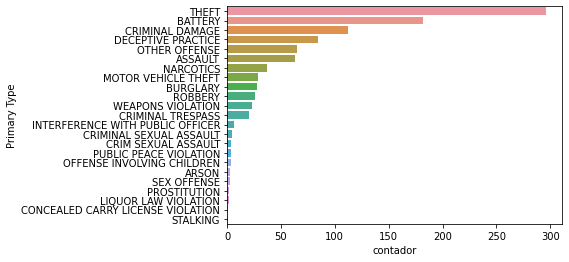

In [130]:
n=df.iloc[100:121] 
print(n)
print("-------grafica------")
print()
ax = sns.barplot(x = "contador", y="Primary Type", data = datos_info)

Leer el dataset country_vaccinations.csv y filtrar los datos para Colombia Crear un csv con los datos para colombia Realizar una comparacion con los paises latinoamericanos. A traves de mascaras determinar el numero de vacunados en el intervalo [1.5E6, 2.0E6]

In [133]:
v='https://docs.google.com/spreadsheets/d/e/2PACX-1vQCHo4jf0NTe6yD4SxQ-Y5mfYHnao-WC3GlE9QGh6xtkqs5iyXRv_khyP4pdn-qC2D-sOmyWyDzRoVE/pub?output=csv'
df=pd.read_csv(v)
df


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Zimbabwe,ZWE,2021-03-29,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9572,Zimbabwe,ZWE,2021-03-30,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9573,Zimbabwe,ZWE,2021-03-31,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9574,Zimbabwe,ZWE,2021-04-01,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...


In [134]:
print()
col =df[((df.country=='Colombia'))]
col

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1841,Colombia,COL,2021-02-17,18.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1842,Colombia,COL,2021-02-18,9935.0,NaN,NaN,9917.0,9917.0,0.02,NaN,NaN,195.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1843,Colombia,COL,2021-02-19,21307.0,NaN,NaN,11372.0,10644.0,0.04,NaN,NaN,209.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1844,Colombia,COL,2021-02-20,33140.0,NaN,NaN,11833.0,11041.0,0.07,NaN,NaN,217.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1845,Colombia,COL,2021-02-21,39827.0,NaN,NaN,6687.0,9952.0,0.08,NaN,NaN,196.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1846,Colombia,COL,2021-02-22,45166.0,NaN,NaN,5339.0,9030.0,0.09,NaN,NaN,177.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1847,Colombia,COL,2021-02-23,48150.0,NaN,NaN,2984.0,8022.0,0.09,NaN,NaN,158.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1848,Colombia,COL,2021-02-24,50524.0,NaN,NaN,2374.0,7215.0,0.10,NaN,NaN,142.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1849,Colombia,COL,2021-02-25,66157.0,NaN,NaN,15633.0,8032.0,0.13,NaN,NaN,158.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1850,Colombia,COL,2021-02-26,81333.0,NaN,NaN,15176.0,8575.0,0.16,NaN,NaN,169.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...


In [136]:
#datos del diccionarios

data=df[((df.country=='Colombia') | (df.country=='Mexico') | (df.country=='Chile') | (df.country=='Brasil') | (df.country=='Argentina') | (df.country=='Ecuador') | (df.country=='Venezuela') | (df.country=='Peru'))]
data.to_csv('Datos_Colombia.csv',index=True)
pd.read_csv('Datos_Colombia.csv')



,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,293,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,294,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,295,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,296,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,297,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,9388,Venezuela,VEN,2021-03-22,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN,3.0,Sputnik V,Government of Venezuela,https://cronica.uno/cinco-semanas-de-vacunacio...
501,9389,Venezuela,VEN,2021-03-23,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN,3.0,Sputnik V,Government of Venezuela,https://cronica.uno/cinco-semanas-de-vacunacio...
502,9390,Venezuela,VEN,2021-03-24,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN,3.0,Sputnik V,Government of Venezuela,https://cronica.uno/cinco-semanas-de-vacunacio...
503,9391,Venezuela,VEN,2021-03-25,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN,3.0,Sputnik V,Government of Venezuela,https://cronica.uno/cinco-semanas-de-vacunacio...


In [147]:
#seleccion por paises latinoamericanos

seleccion = data.groupby("country").date.count().sort_values(ascending = False)
print(seleccion)
print()
print("------vacunacion/dias por pais------")
print()
vacunacion= seleccion.reset_index()
vacunacion= vacunacion.rename(columns={"date":"vaccination days"})
print(vacunacion)
print()
print("-----vacunacion total ------")
total=df[((df.total_vaccinations>1.5e6) | (df.total_vaccinations==1.5e6)) & ((df.total_vaccinations<2.0e6) | (df.total_vaccinations==2.0e6))]
print(total)


country
Mexico       101
Chile        101
Argentina     96
Ecuador       71
Peru          53
Colombia      45
Venezuela     38
Name: date, dtype: int64

------vacunacion/dias por pais------

     country  vaccination days
0     Mexico               101
1      Chile               101
2  Argentina                96
3    Ecuador                71
4       Peru                53
5   Colombia                45
6  Venezuela                38

-----vacunacion total ------
        country  ...                                     source_website
361   Argentina  ...  http://datos.salud.gob.ar/dataset/vacunas-cont...
362   Argentina  ...  http://datos.salud.gob.ar/dataset/vacunas-cont...
363   Argentina  ...  http://datos.salud.gob.ar/dataset/vacunas-cont...
364   Argentina  ...  http://datos.salud.gob.ar/dataset/vacunas-cont...
365   Argentina  ...  http://datos.salud.gob.ar/dataset/vacunas-cont...
...         ...  ...                                                ...
9527      Wales  ...  https